In [ ]:
import numpy as np
import pandas as pd
import random
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
random.seed()

Был загружен датасет с помощью библиотеки pandas.

In [ ]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")

Были выведены первые 10 строк данных.

In [ ]:

df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


Обзор каждого столбца датасета:


*   Идентификатор человека (Person ID): идентификатор каждого человека.
*   Пол(Gender): Пол человека (Мужской/Женский).



*   Возраст (Age): Возраст человека в годах

*  Род занятий (Occupation) : Род занятий или профессия человека.

*   Продолжительность сна (часы) (Sleep Duration ): количество часов, в течение которых человек спит в день.

*   Качество сна (шкала: 1–10) (Quality of Sleep ): субъективная оценка качества сна в диапазоне от 1 до 10.
*   Уровень физической активности (минут/день) (Physical Activity Level ): количество минут, в течение которых человек ежедневно занимается физической активностью.


*   Уровень стресса (шкала: 1–10) (Stress Level ): субъективная оценка уровня стресса, испытываемого человеком, в диапазоне от 1 до 10.

*   Категория ИМТ (BMI Category): категория ИМТ человека (например, недостаточный вес, нормальный, избыточный вес).


*   Кровяное давление (систолическое/диастолическое): измерение артериального давления человека, обозначаемое как превышение систолического давления над диастолическим давлением.



*   Кровяное давление (систолическое/диастолическое) (Blood Pressure): измерение артериального давления человека, обозначаемое как превышение систолического давления над диастолическим давлением.

*   Частота сердечных сокращений (уд/мин) (Heart Rate ): частота сердечных сокращений человека в состоянии покоя в ударах в минуту.
*   Ежедневные шаги (Daily Steps): количество шагов, которые человек делает за день.


*   Расстройство сна (Sleep Disorder): наличие или отсутствие расстройств сна у человека (отсутствует, бессонница, апноэ во сне).





С помощью метода info была выведена информация о данных для просмотра типов данных и проверки, все ли типы данных удовлетворяют условию.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Все типы данных корректны для своих атрибутов.

Была проведена проверка на строки с пропусками.

In [ ]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Строк с пропусками не обнаружено

Была получена информачия о количестве дубликатов

In [ ]:
df.duplicated().sum()

0

Для удобства был исключен столбец Person ID

In [ ]:
df = df.drop('Person ID', axis = 1)

С помощью метода unique() были проверены столбцы на наличие неявных дубликатов.

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

В столбце BMI Category был обнаружен неявный дубликат. В данном случае Normal и Normal Weight означает одно и то же, а значит, одно можно заменить на другое.

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight','Normal')

In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [ ]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df['Sleep Disorder'].unique()


array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

Значения типа object были переведены в значения типа float для удобства работы и достоверности значений.

In [ ]:
def divide_results(string):
  values = string.split("/")
  result = int(values[0])/int(values[1])
  return result
df['Blood Pressure'] = df['Blood Pressure'].apply(divide_results)

df.head(100)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,1.518072,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,1.562500,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,1.562500,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,1.555556,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,1.555556,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,36,Accountant,7.1,8,60,4,Normal,1.533333,68,7000,None
96,Female,36,Accountant,7.2,8,60,4,Normal,1.533333,68,7000,None
97,Female,36,Accountant,7.1,8,60,4,Normal,1.533333,68,7000,None
98,Female,36,Teacher,7.1,8,60,4,Normal,1.533333,68,7000,None


Была проведена стандартизация данных с помощью Standard Scaler и Label Encoder, который присваивает каждому уникальному значению типа Object своё уникальное значение типа int64.

In [ ]:
df_for_scaling = df.select_dtypes(exclude=['object'])

df_scaled_for = df

label_encoder = LabelEncoder()
for column in df_scaled_for.select_dtypes(include=['object']):
  df_scaled_for[column] = label_encoder.fit_transform(df[column])

scaler = StandardScaler()
df_scaled_for = scaler.fit_transform(df_scaled_for)

df_scaled = pd.DataFrame(df_scaled_for, columns = df.columns)


Датафрейм был разбит на признаки и целевые признаки

In [ ]:
y = df['Quality of Sleep']
x = df_scaled.drop('Quality of Sleep', axis = 1)


Набор был разбит на обучающие и валидационные данные

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.25, random_state = 32)

Была создана последовательная модель с помощью Sequential, добавлены слои с помощью Dense. Было создано 3 модели, без скрытых слоёв, с одним скрытым слоем, с двумя скрытыми слоями, во всех слоях нет функции активации, на выходе - 1 нейрон.

In [ ]:
model = Sequential()
model.add(Dense(units=64,activation = 'relu', input_dim = 11)) # преобразует отрицательные значения в 0, положительные без изменений
model.add(Dense(units = 1, activation = None))

In [ ]:
model_1_layer = Sequential()
model_1_layer.add(Dense(units=64,activation = 'relu', input_dim = 11))
model_1_layer.add(Dense(units=32, activation = None)) # преобразует входные данныев диапозоне от 0 до 1
model_1_layer.add(Dense(units = 1, activation = None))

In [ ]:
model_2_layer = Sequential()
model_2_layer.add(Dense(units=64,activation = 'relu', input_dim = 11))
model_2_layer.add(Dense(units=32, activation = None))
model_2_layer.add(Dense(units=16, activation = None)) # преобразует вектора значений в вектор вероятностей (от 0 до 1), сумма всех значений - 1
model_2_layer.add(Dense(units = 1, activation = None))

Был вызван метод summary для каждой из моделей

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                768       
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


В данном случае модель с двумя слоями (входной и выходной), в первом 64 нейрона, 11 элементов подаётся на вход каждого нейрона, кол-во обучаемых параметров равно произведению кол-ва нейронов в прошлом слое (в данном случае в этом) на размерность входа + кол-во нейронов в этом слое. Во втором слое один нейрон, кол-во параметров - 1*64 + 1,в столбце слоёв (Layer) указано, что каждый слой - полносвязный (Dense слой) (все входы связаны со всеми нейронами в слое), число после нижнего подчеркивания указывает на номер слоя в данной модели.

In [ ]:
model_1_layer.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                768       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


В данной модели три слоя. В первом 64 нейрона, во втором 32, в третьем 1, кол-во параметров вычисляется таким же методом, в столбце слоёв (Layer) указано, что каждый слой - полносвязный (Dense слой) (все входы связаны со всеми нейронами в слое), число после нижнего подчеркивания указывает на номер слоя в данной модели.

In [ ]:
model_2_layer.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                768       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


В данной модели три слоя. В первом 64 нейрона, во втором 32, в третьем 16, в последнем - 1, кол-во параметров вычисляется таким же методом, в столбце слоёв (Layer) указано, что каждый слой - полносвязный (Dense слой) (все входы связаны со всеми нейронами в слое), число после нижнего подчеркивания указывает на номер слоя в данной модели.

Номера слоёв же идут последовательно по причине того, что каждому новому слою присваивается уникальный индекс в глобальном реестре слоев TensorFlow, что помогает избежать конфликтов при работе с несколькими моделями.

Были заданы разные параметры в compile для разных моделей. Это позволяет настроить процесс обучения, функция потерь loss определяет, как модель будет вычислять разницу между предсказанными и истинными значениями, оптимизатор определяет, как обновляются веса модели, метрики используются для мониторинга производительности модели. Optimizer определяет алгоритм по которому будет проводится обновление синапсов нейронов, SGD "Stochastic Gradient Descent" - классический вариант, который минимизирует потери на основе градиента, выбирая на каждой итерации обучающзие данные случайным образом.

In [ ]:
model.compile(loss = "mse", optimizer = 'sgd',metrics = ['mae'])
model_1_layer.compile(loss = "mse", optimizer = 'sgd',metrics = ['mae'])
model_2_layer.compile(loss = "mse", optimizer = 'sgd',metrics = ['mae'])

Модели были обучены с помощью fit

In [ ]:
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 10, validation_split = 0.25) # batch_size - размер группы данных, после которойо происходит пересчёт синапсов нейоронов (обновление градиента)


Epoch 1/20
21/21 [==============================] - 1s 11ms/step - loss: 14.8102 - mae: 2.9969 - val_loss: 1.6133 - val_mae: 1.0189
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 1.1336 - mae: 0.7835 - val_loss: 0.9572 - val_mae: 0.7437
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 0.7954 - mae: 0.6245 - val_loss: 0.7255 - val_mae: 0.5823
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 0.5910 - mae: 0.5028 - val_loss: 0.5921 - val_mae: 0.5183
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.4663 - mae: 0.4370 - val_loss: 0.4866 - val_mae: 0.4569
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 0.3742 - mae: 0.3846 - val_loss: 0.4293 - val_mae: 0.4029
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 0.3106 - mae: 0.3409 - val_loss: 0.3954 - val_mae: 0.3955
Epoch 8/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2751 - mae: 0.

По данным значениям loss и mse можно сделать вывод, что модель без скрытого слоя нейронов достигает хороших результатов за 20 эпох обучения.

In [ ]:
history_1_layer = model_1_layer.fit(X_train, Y_train, epochs = 20, batch_size = 32,validation_split = 0.25)


Epoch 1/20
7/7 [==============================] - 1s 34ms/step - loss: 18.5697 - mae: 3.4160 - val_loss: 1.3644 - val_mae: 0.8326
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 1.1914 - mae: 0.7984 - val_loss: 0.9304 - val_mae: 0.6839
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.7838 - mae: 0.6136 - val_loss: 0.7200 - val_mae: 0.5906
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6372 - mae: 0.5325 - val_loss: 0.6222 - val_mae: 0.5810
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.5424 - mae: 0.4627 - val_loss: 0.5354 - val_mae: 0.4815
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4255 - mae: 0.3937 - val_loss: 0.5057 - val_mae: 0.5006
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3723 - mae: 0.3765 - val_loss: 0.4800 - val_mae: 0.4800
Epoch 8/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3259 - mae: 0.3524 - val_los

По данным значениям loss и mse можно сделать вывод, что модель с одним слоем скрытых нейронов может достигает высокой точности в предсказывании значений.

In [ ]:
history_2_layer = model_2_layer.fit(X_train, Y_train, epochs = 20, batch_size = 32,validation_split = 0.25)


Epoch 1/20
7/7 [==============================] - 1s 36ms/step - loss: 13.1892 - mae: 2.6709 - val_loss: 1.7658 - val_mae: 1.0563
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 1.2521 - mae: 0.8974 - val_loss: 0.8655 - val_mae: 0.6713
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.7317 - mae: 0.6300 - val_loss: 0.6797 - val_mae: 0.6618
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5974 - mae: 0.5761 - val_loss: 0.8356 - val_mae: 0.7140
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4743 - mae: 0.4810 - val_loss: 0.4498 - val_mae: 0.4216
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.3363 - mae: 0.3927 - val_loss: 0.3942 - val_mae: 0.4267
Epoch 7/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3081 - mae: 0.3953 - val_loss: 0.3654 - val_mae: 0.4266
Epoch 8/20
7/7 [==============================] - 0s 8ms/step - loss: 0.3142 - mae: 0.4116 - val_los

По данным значениям loss и mse можно сделать вывод, что модель с двумя слоями скрытых нейронов может достигать высокой точности в предсказывании значений, однако немного хуже, чем модель с одним слоем скрытых нейронов

По результатам обучения группы моделей, которые отличаются кол-вом слоёв, можно сделать вывод, что вторая модель с одним скрытым слоем обучилась лучше всего.

Было выполнено предсказание на валидационных данных

In [ ]:
preds = model.predict(X_test)
preds_1_layer = model_1_layer.predict(X_test)
preds_2_layer = model_2_layer.predict(X_test)

3/3 [==============================] - 0s 4ms/step


3/3 [==============================] - 0s 4ms/step


3/3 [==============================] - 0s 4ms/step


Был создан датафрейм с истинными и предсказанными значениями

In [ ]:
df_preds = pd.DataFrame({"Preds":np.array(preds).flatten(),
                         "Actuals":Y_test})
df_preds_1_layer = pd.DataFrame({"Preds":np.array(preds_1_layer).flatten(),
                         "Actuals":Y_test})
df_preds_2_layer = pd.DataFrame({"Preds":np.array(preds_2_layer).flatten(),
                         "Actuals":Y_test})


In [ ]:
df_preds

,Preds,Actuals
107,8.122943,8
56,6.898339,7
358,8.669772,9
60,5.904675,6
271,5.937769,6
...,...,...
134,7.802623,8
3,5.373306,4
344,9.142681,9
63,6.023880,6


In [ ]:
df_preds_1_layer

,Preds,Actuals
107,7.706711,8
56,6.715694,7
358,8.219441,9
60,5.708961,6
271,5.639708,6
...,...,...
134,7.447385,8
3,5.504120,4
344,8.963690,9
63,5.721078,6


In [ ]:
df_preds_2_layer

,Preds,Actuals
107,7.580626,8
56,6.886705,7
358,8.567014,9
60,5.807211,6
271,5.991910,6
...,...,...
134,7.760655,8
3,4.765265,4
344,9.157308,9
63,5.852030,6


По значениям данных датафреймов, можно сказать, что модель достаточно точно предсказывает значения, однако подобная оценка не может быть достоверной, т.к. выводится лишь малая часть значений.

Данные о предсказаниях были переформатированы для корректной работы.

In [ ]:
reshaped_preds = np.array(df_preds['Preds']).reshape(-1,1)
reshaped_preds_1_layer = np.array(df_preds_1_layer['Preds']).reshape(-1,1)
reshaper_preds_2_layer = np.array(df_preds_2_layer['Preds']).reshape(-1,1)

Был построен график правильных и предсказанных значений для каждой из моделей

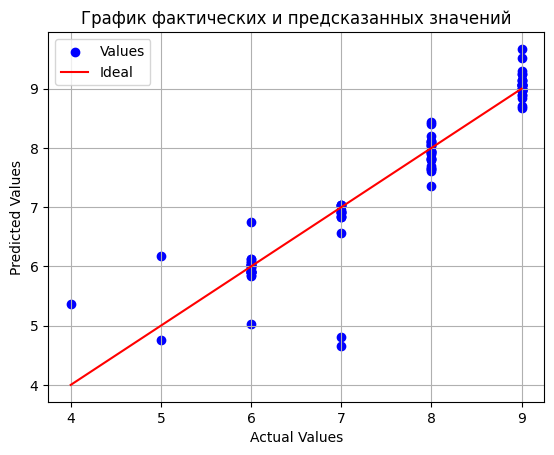

In [ ]:
plt.scatter(df_preds['Actuals'],reshaped_preds, color = 'b', label = "Values")

plt.plot([min(df_preds['Actuals']),max(df_preds['Actuals'])],[min(df_preds['Actuals']),max(df_preds['Actuals'])], color = 'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

По данному графику можно сделать вывод, что модель достаточно хорошо предсказывает значения, т.к. достаточное количество лежит близко к диагонали.

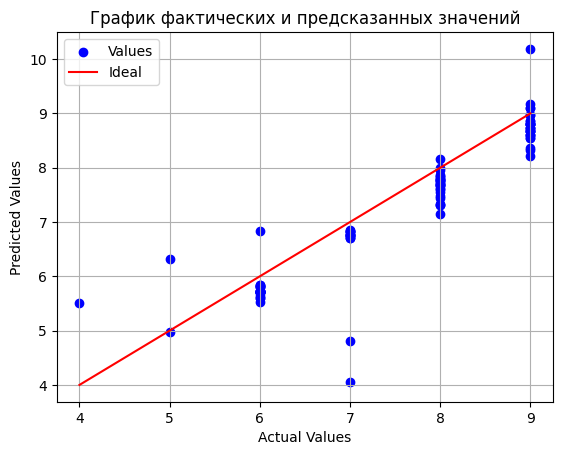

In [ ]:
plt.scatter(df_preds_1_layer['Actuals'],reshaped_preds_1_layer, color = 'b', label = "Values")

plt.plot([min(df_preds_1_layer['Actuals']),max(df_preds_1_layer['Actuals'])],[min(df_preds_1_layer['Actuals']),max(df_preds_1_layer['Actuals'])], color = 'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

По данному графику можно сказать, что он предсказывает значения лучше, чем предыдущая модель

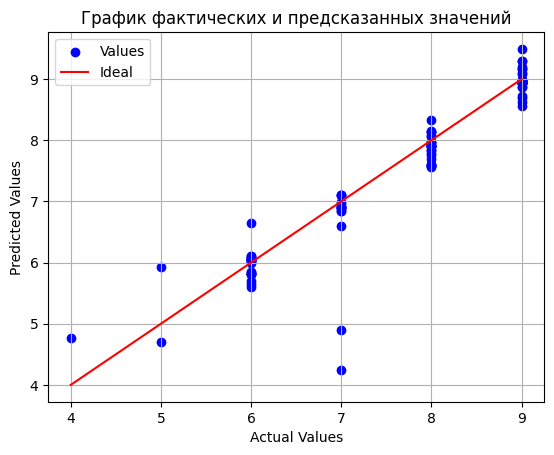

In [ ]:
plt.scatter(df_preds_2_layer['Actuals'],reshaper_preds_2_layer, color = 'b', label = "Values")

plt.plot([min(df_preds_2_layer['Actuals']),max(df_preds_2_layer['Actuals'])],[min(df_preds_2_layer['Actuals']),max(df_preds_2_layer['Actuals'])], color = 'r', label = "Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.title("График фактических и предсказанных значений")
plt.legend()

Судя по графику, можно сделать вывод, что данная модель предсказывает значения хуже всех из первой группы моделей.

По данным графикам можно сделать вывод, что важное место в обучении модели играет правильно подобранные метрики и количество слоёв.

Была получена история ошибок и метрик по эпохам для каждой модели.

In [ ]:
loss_history = history.history['loss']
metrics = history.history['mae']
loss_history_val = history.history['val_loss']
metrics_val = history.history['val_mae']

Были построены графики ошибок на обучающем и валидационном наборе по эпохам обучения

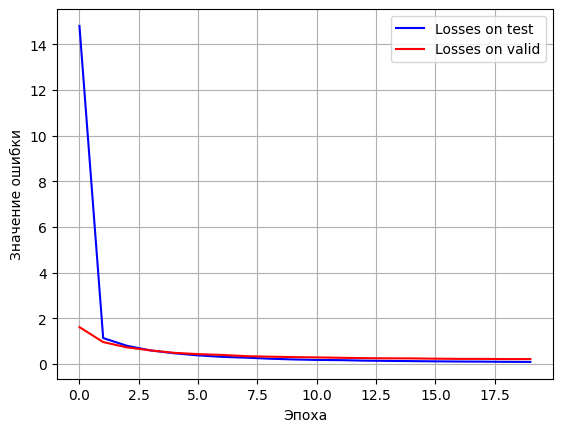

In [ ]:
plt.plot(np.arange(20),loss_history,  color = 'b', label = "Losses on test")
plt.plot( np.arange(20),loss_history_val, color = 'r', label = "Losses on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

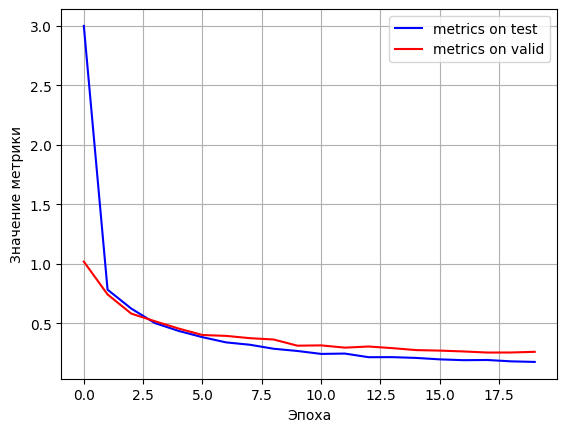

In [ ]:
plt.plot(np.arange(20),metrics,  color = 'b', label = "metrics on test")
plt.plot( np.arange(20),metrics_val, color = 'r', label = "metrics on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение метрики")
plt.legend()
plt.grid()
plt.show()

По данному графику можно сделать вывод, что после пятой эпохи показатели метрик на валидационных данных стали хуже в сравнении с показателями на тестовых. Показатель ошибок тоже стал хуже после пятой эпохи, однако в меньшей степени.

In [ ]:
loss_history_1_layer = history_1_layer.history['loss']
metrics_1_layer = history_1_layer.history['mae']
loss_history_1_layer_val = history_1_layer.history['val_loss']
metrics_1_layer_val = history_1_layer.history['val_mae']

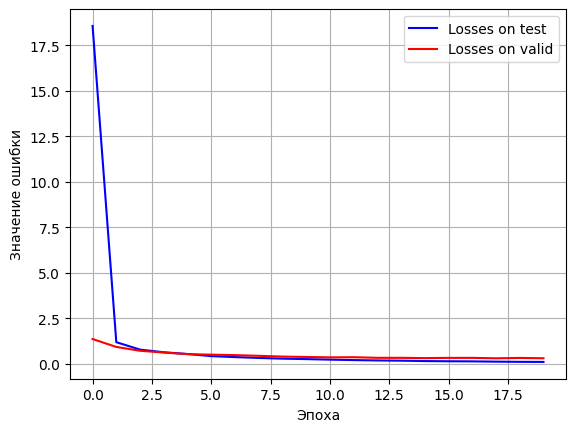

In [ ]:
plt.plot(np.arange(20),loss_history_1_layer,  color = 'b', label = "Losses on test")
plt.plot( np.arange(20),loss_history_1_layer_val, color = 'r', label = "Losses on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

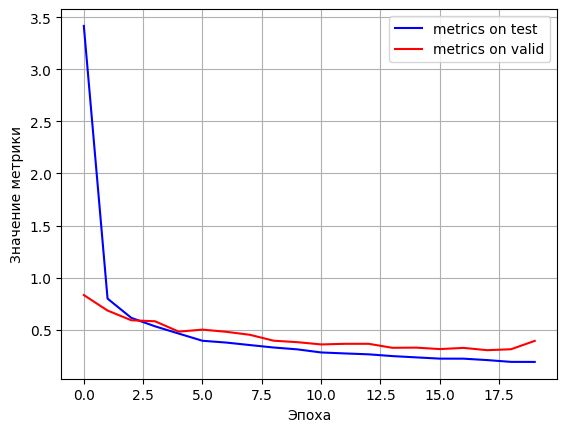

In [ ]:
plt.plot(np.arange(20),metrics_1_layer,  color = 'b', label = "metrics on test")
plt.plot( np.arange(20),metrics_1_layer_val, color = 'r', label = "metrics on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение метрики")
plt.legend()
plt.grid()
plt.show()

По данному графику можно сделать вывод, что после девятой эпохи показатель метрик на валидационных данных стал показывать значения хуже, чем показатели метрик на тестовых. Данная модель лучше обучается с каждой эпохой, чем первая. Потери на тестовых и валидационных данных достаточно близки после второй эпохи.

In [ ]:
loss_history_2_layer = history_2_layer.history['loss']
metrics_2_layer = history_2_layer.history['mae']
loss_history_2_layer_val = history_2_layer.history['val_loss']
metrics_2_layer_val = history_2_layer.history['val_mae']

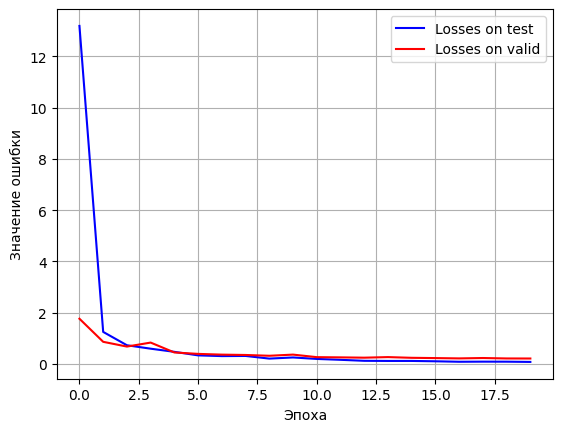

In [ ]:
plt.plot( np.arange(20),loss_history_2_layer, color = 'b', label = "Losses on test")
plt.plot(np.arange(20),loss_history_2_layer_val,  color = 'r', label = "Losses on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

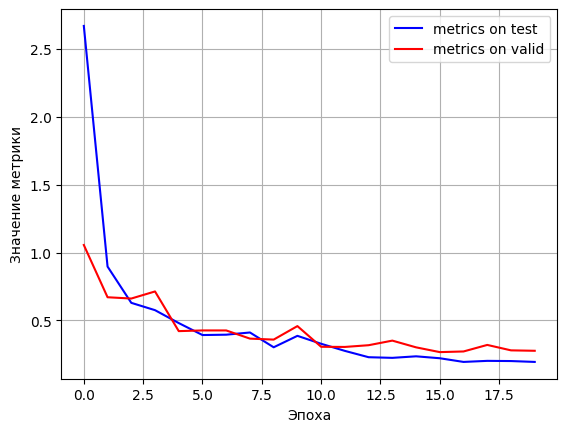

In [ ]:
plt.plot(np.arange(20),metrics_2_layer,  color = 'b', label = "metrics on test")
plt.plot( np.arange(20),metrics_2_layer_val, color = 'r', label = "metrics on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение метрики")
plt.legend()
plt.grid()
plt.show()

На данном графике значение ошибки примерно на том же уровне, что и у прошлых. Сами же значеня ошибок изначально ниже. Значения метрик же на тестовых данных лучше, чем на валидационных. График метрик на валидационных данных показывает худшие значения в сравнении с графиком на тестовых данных.

Был загружен датасет, проведена предварительная обработка данных.

In [ ]:
df = pd.read_csv("/content/5gym_churn.csv")

Была выведена информация о количестве нуль строк в датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

По результатам вывода была получена информация о том, что нуль строки отсутствуют, также можно сделать вывод о том, что в Month_to_end_contract неправильный тип данных (float64, хотя должен быть Int64).

Датасет содержит следующие данные:
*   1 Gender - Пол

*   2 Near_Location - Близкое расположение

*   3 Partner - Сотрудник компании партнера

*   4 Promo_friends - По промо друзей

*   5 Phone -  Указан ли телефон

*   6 Contract_period - Длительность текущего абонемента

*   7 Group_visits - Посещение групповых занятий

*   8 Age - Возраст

*   9 Avg_additional_charges_total - Средние траты на дополнительные услуги

*   10 Month_to_end_contract - Количество месяцев до окончания абонемента

*   11 Lifetime - время с момента первого обращения в фитнесцентр (в месяцах)

*   12 Avg_class_frequency_total - средняя частота посещений в неделю за все время с начала действия абонемента

*   13 Month_to_end_contract - средняя частота посещений в неделю за предыдущий месяц

*   14 Churn - факт ухода из клуба

Было подсчитано количество дубликатов

In [ ]:
df.duplicated().sum()

0

Не было найдено дубликатов

Тип данных для столбца Month_to_end_contract был изменен на int.

In [ ]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

Была создана и обучена модель

In [ ]:
x = np.array(df.drop(['Churn'], axis = 1))
y = np.array(df['Churn'])

x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [ ]:
model_part_2 = Sequential()

model_part_2.add(Dense(units=64,activation = 'sigmoid', input_dim = 13)) # преобразует отрицательные значения в 0, положительные без изменений
model_part_2.add(Dense(units=32, activation = 'sigmoid', input_dim = 13))
model_part_2.add(Dense(units = 1, activation = 'sigmoid'))


In [ ]:
model_part_2.compile(loss = "binary_crossentropy", optimizer = 'sgd',metrics = ['mae'])

In [ ]:
history_part_2 = model_part_2.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.33)

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 0.5865 - mae: 0.3820 - val_loss: 0.5772 - val_mae: 0.3843
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5826 - mae: 0.3903 - val_loss: 0.5760 - val_mae: 0.3877
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5810 - mae: 0.3886 - val_loss: 0.5757 - val_mae: 0.3946
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5800 - mae: 0.3942 - val_loss: 0.5744 - val_mae: 0.3899
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5790 - mae: 0.3920 - val_loss: 0.5735 - val_mae: 0.3886
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5781 - mae: 0.3913 - val_loss: 0.5727 - val_mae: 0.3879
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5771 - mae: 0.3897 - val_loss: 0.5720 - val_mae: 0.3894
Epoch 8/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5761 - mae: 0.39

In [ ]:
preds = model_part_2.predict(x_valid)

32/32 [==============================] - 0s 1ms/step


Была получена история ошибок и метрик модели. Были построены графики


In [ ]:
loss_history_2 = history_part_2.history['loss']
metrics_2 = history_part_2.history['mae']
loss_history_2_val = history_part_2.history['val_loss']
metrics_2_val = history_part_2.history['val_mae']

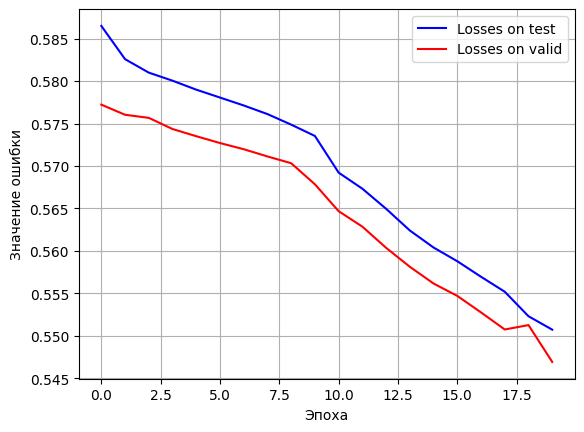

In [ ]:
plt.plot(np.arange(20),loss_history_2,  color = 'b', label = "Losses on test")
plt.plot(np.arange(20),loss_history_2_val,  color = 'r', label = "Losses on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

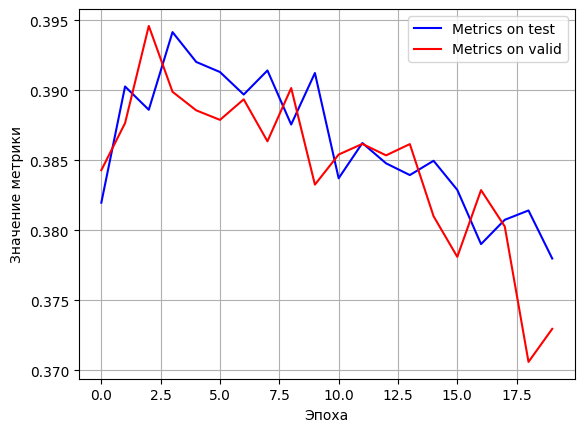

In [ ]:
plt.plot(np.arange(20),metrics_2,  color = 'b', label = "Metrics on test")
plt.plot(np.arange(20),metrics_2_val,  color = 'r', label = "Metrics on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение метрики")
plt.legend()
plt.grid()
plt.show()

По данным графикам можно сделать вывод о том, что с каждой эпохой уровень ошибки падал, однако уровень показателя метрики на валидационных данных судя по общей картине снижался, но раз в несколько эпох поднимался выше тестовых значений.

Был построен график ROC-кривой

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid, preds)

Text(0.5, 1.0, 'ROC-кривая')

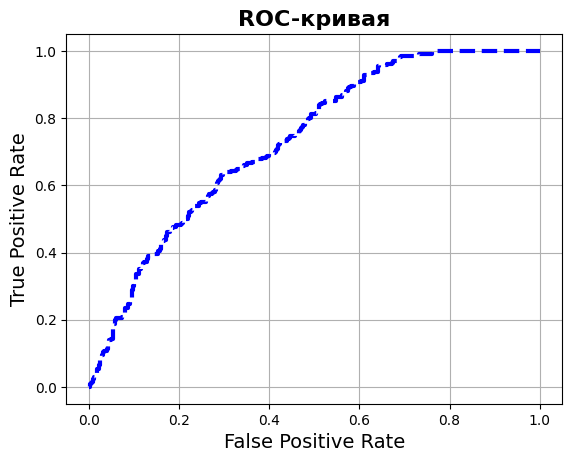

In [ ]:
plt.plot(fpr, tpr, color = 'blue',linestyle = '--',linewidth = 3)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlabel('False Positive Rate',fontsize=14)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16,fontweight=1000)

Показатели досаточно хороши, т.к. близки к единице, что значит, что площадь под графиком увеличивается, что говорит нам о том, что показатели хороши.

В результате выполнения данной работы была выполнена задача регрессии с помощью нейронной сети. Были созданы последовательные модели с разным количеством скрытых слоёв, благодаря чему была изучена зависимость результатов предсказыванияя от колиества слоёв (при отсутствии скрытых слоёв модель значительно хуже обучается). В данной работе была выполнена обработка данных зависимости образа жизни и различных факторов на качество сна. Были построены графики по показателям ошибки и метрики качества, были сделаны выводы. По графикам и истории обучения по эпохам можно сделать выводы, что для хорошего обучения модели необходимо грамотно подобрать ошибки и метрики для обучения, также количество слоёв играет важную роль.

Сравнить результаты классификации при подаче меньшего количества столбцов в input_dim

Было взято меньше столбцов данных для проверки

In [ ]:
x = np.array(df.iloc[:, :8])

#x = np.array(df.drop(['Churn'], axis = 1))
y = np.array(df['Churn'])

x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.25,random_state = 0)

Модель была создана, обучена. Были созданы графики.

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 0.6378 - mae: 0.4572 - val_loss: 0.5800 - val_mae: 0.4077
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5810 - mae: 0.3991 - val_loss: 0.5730 - val_mae: 0.3932
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5770 - mae: 0.3944 - val_loss: 0.5700 - val_mae: 0.3855
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5750 - mae: 0.3890 - val_loss: 0.5680 - val_mae: 0.3867
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5730 - mae: 0.3892 - val_loss: 0.5663 - val_mae: 0.3869
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5712 - mae: 0.3883 - val_loss: 0.5648 - val_mae: 0.3872
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5696 - mae: 0.3883 - val_loss: 0.5632 - val_mae: 0.3859
Epoch 8/20
63/63 [==============================] - 0s 3ms/step - loss: 0.5682 - mae: 0.38

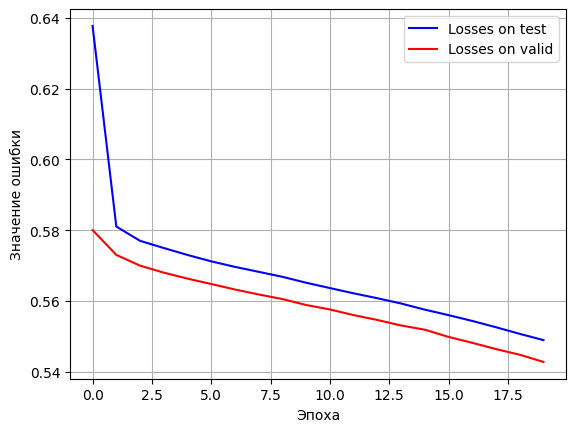

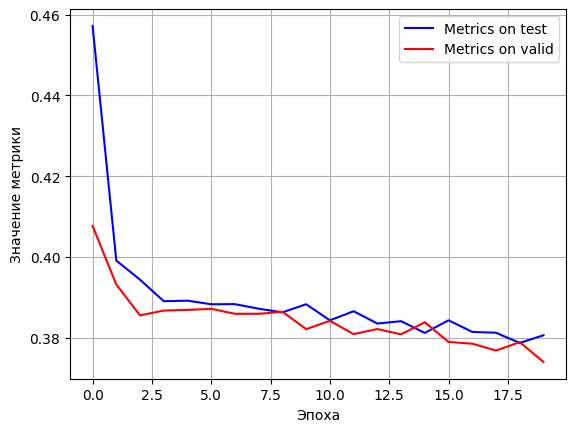

Text(0.5, 1.0, 'ROC-кривая')

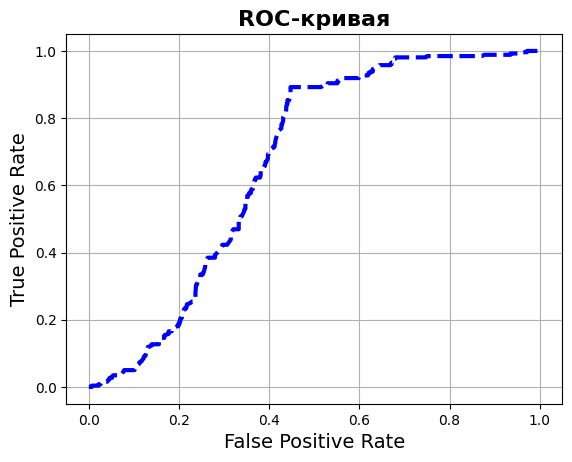

In [ ]:
model_part_2 = Sequential()

model_part_2.add(Dense(units=64,activation = 'sigmoid', input_dim = 8)) # преобразует отрицательные значения в 0, положительные без изменений
model_part_2.add(Dense(units=32, activation = 'sigmoid', input_dim = 8))
model_part_2.add(Dense(units = 1, activation = 'sigmoid'))
model_part_2.compile(loss = "binary_crossentropy", optimizer = 'sgd',metrics = ['mae'])

history_part_2 = model_part_2.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.33)

preds = model_part_2.predict(x_valid)

loss_history_2 = history_part_2.history['loss']
metrics_2 = history_part_2.history['mae']
loss_history_2_val = history_part_2.history['val_loss']
metrics_2_val = history_part_2.history['val_mae']

plt.plot(np.arange(20),loss_history_2,  color = 'b', label = "Losses on test")
plt.plot(np.arange(20),loss_history_2_val,  color = 'r', label = "Losses on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение ошибки")
plt.legend()
plt.grid()
plt.show()

plt.plot(np.arange(20),metrics_2,  color = 'b', label = "Metrics on test")
plt.plot(np.arange(20),metrics_2_val,  color = 'r', label = "Metrics on valid")
plt.xlabel("Эпоха")
plt.ylabel("Значение метрики")
plt.legend()
plt.grid()
plt.show()

fpr, tpr, thresholds = roc_curve(y_valid, preds)
plt.plot(fpr, tpr, color = 'blue',linestyle = '--',linewidth = 3)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlabel('False Positive Rate',fontsize=14)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16,fontweight=1000)

Судя по данным графикам, можно сделать выводы о том, что в случае, если нейронная сеть получает на вход меньшее кол-во столбцов данных, показатели метрик и ошибки улучшаются, однако показатели ROC-кривой ухудшились. В данном случае, важно заметить, что при отсутствии тех или иных данных, необходимых для классификации как может улучшить показатели предсказанных данных, так и ухудшить. При наличии неполоноценного набора признаков достоверность предсказанных значений падает.